In [3]:
#Question 1, Python Program for number of independent columns
import numpy as np
from numpy.linalg import matrix_rank
import sympy as sy
A = np.array(
    [
        [-1.32,-0.18,2.13],
        [2.64,-4.68,4.65],
        [1.47,-4.75,6.80]
    ])
_, inds = sy.Matrix(A).rref()  #Finds indices of independent columns 
print("The indices of independent columns are:\n", inds)
print("\nRank is:\n", matrix_rank(A)) #Finds rank which determines number of independent columns

The indices of independent columns are:
 (0, 1, 2)

Rank is:
 3


In [2]:
#Question 2,Least Square Estimation

import numpy as np
from numpy.linalg import inv

# X and Y coordinates from problem description
x = [-1, 2.5, 6.0, -3.5, 3.0, 8.5]
y = [8.5, 3.0, -5.5, 13.0, 0.0, -10.0]

# TODO: Form the A matrix and the b vector
A = np.vstack([x, np.ones(len(x))]).T;
b = np.vstack([y]).T;

# TODO: Find the vector q
q = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),b)
q=np.vstack([q]);

# Display computed q vector
print('y = {0:2.3f}x + {1:2.3f}'.format(float(q[0]), float(q[1])))

y = -1.941x + 6.515


In [4]:
#Question 6, Uncorrupted image and least squares
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt
from numpy import asarray

In [5]:
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cguitar.tif to cguitar.tif
User uploaded file "cguitar.tif" with length 105324 bytes


In [6]:
img = np.asarray(Image.open('cguitar.tif'))

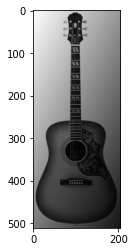

In [7]:
# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

Estimated Parameters and graph
 [[-1.04197785e+00 -1.79701569e+00 -1.86506926e+00 ...  3.86270766e-08
   3.55912504e-08  3.47093376e-08]
 [-1.23304653e+00 -5.63208930e-01 -1.14069596e+00 ... -1.56254925e-07
  -1.54027678e-07 -1.52729996e-07]
 [ 7.12218613e-01  1.09369492e+00  1.65418917e+00 ...  9.25225283e-08
   9.85410571e-08  9.64418705e-08]
 ...
 [-1.70823510e-01 -2.87703754e-01  1.75789662e-02 ...  9.99999999e-01
  -2.70330291e-09 -2.01293870e-09]
 [ 8.56490774e-02  3.90027013e-01  1.32221483e-01 ...  1.01369402e-09
   1.00000000e+00  1.51531587e-09]
 [-7.06284237e-01 -8.38977279e-01 -6.52362579e-01 ... -1.32662548e-09
  -9.89269333e-10  9.99999999e-01]]


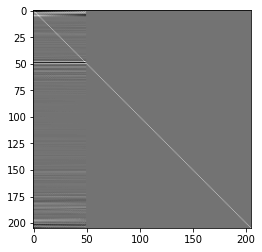

In [8]:
# TODO: Compute least-squares estimate from selected corrupt pixels
#Convert image into array
numpydata = asarray(img)
origin_img = numpydata;

#Generate the x, y coordinates of each pixel
yx_coordinates = np.column_stack(np.where(img >= 0))

#Create an empty 2d array the size of the image
n = len(origin_img)
m = len(origin_img[0])
a = []
for i in range(n):
  a.append([0] * m)
  for j in range(m):
    a[i][j]=origin_img[i][j]

#Fill the array(image) with the true white pixels 
for i in range(len(yx_coordinates)):
  num = i;
  x = yx_coordinates[i][1]
  y = yx_coordinates[i][0]
  if(y<250 and x<50):
    a[y][x]=255  

# The A matrix and the b vector
A = np.vstack(a);
b = np.vstack(origin_img);

# Find vector q
q = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),b)
q=np.vstack([q]);

# Display computed q vector
print('Estimated Parameters and graph\n', q)
plt.imshow(q, cmap='gray')
plt.show() 

In [9]:
# TODO: Undo the image corruption
g=np.linalg.inv(q)
g = np.dot(b,g)
print(g)



[[304.7801213  304.77140869 305.38334668 ... 151.00000038 150.00000038
  150.00000038]
 [  4.46299611   3.28987395   0.78367342 ... 150.99999992 149.99999993
  148.99999993]
 [311.06555949 311.20227986 311.70952794 ... 150.00000037 150.00000037
  149.00000036]
 ...
 [148.51412335 148.25133223 147.82708764 ...  21.00000014  21.00000014
   20.00000014]
 [215.66311772 215.50055006 215.7114774  ...  21.00000025  20.00000025
   20.00000025]
 [166.65843899 166.44337907 166.1517205  ...  21.00000015  20.00000015
   20.00000015]]


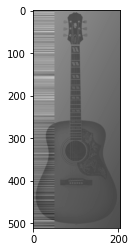

In [10]:
# TODO: Display the uncorrupted image
plt.imshow(g, cmap='gray')
plt.show() 

In [11]:
#Question 7, Extra Credit
import numpy as np
import math
from numpy.linalg import svd
import matplotlib.pyplot as plt

In [12]:
# Create X and Y coordinates for ellipse
# TODO: Play around with these values to understand what each variable means
a, b = 100, 500

t = np.arange(0, 100, 0.01)

x = a*np.sin(t)
y = b*np.cos(t)

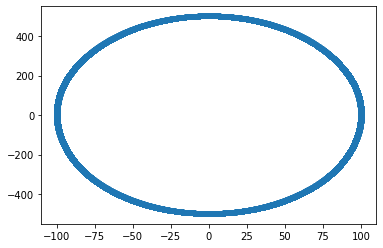

In [13]:
# Display the ellipse
plt.plot(x, y, '*-')
plt.show()

In [14]:
# Rotate the points of the ellipse
cc = np.cos(np.pi / 3)
ss = np.sin(np.pi / 3)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

rpts = np.dot(R, pts)

In [15]:
rpts.shape

(2, 10000)

In [16]:
# TODO: Compute the rotated angle in radians and degrees from rpts

#Performing SVD
#Matrices U and V causes rotation
#Diagonal matrix D causes scaling
U, D, VT = np.linalg.svd(rpts)
arctan = U[0][0]/U[1][0]
print('Angle in radians ', arctan)
d = math.degrees(arctan)
print('Angle in degrees: ', d)

# TODO: Change the rotation angle and repeat computation
# Rotate the points of the ellipse
ccc = np.cos(np.pi / 6)
sss = np.sin(np.pi / 6)
R = np.array([[ccc, sss],
              [-sss, ccc]])
pts = np.stack((x, y))
rpts2 = np.dot(R, pts)

U, D, VT = np.linalg.svd(rpts2)
arctan = U[0][0]/U[1][0]
print('\nAngle in radians after rotation change: ', arctan)
d = math.degrees(arctan)
print('Angle in degrees after rotation change: ', d)

Angle in radians  1.7342361739504721
Angle in degrees:  99.36441344627774

Angle in radians after rotation change:  0.5780782653857952
Angle in degrees after rotation change:  33.12144483484961


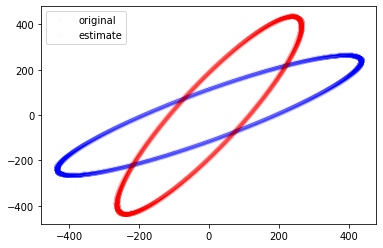

In [17]:
# Rotate original points based on estimate
est_rot_angle = np.pi / 6
cc = np.cos(est_rot_angle)
ss = np.sin(est_rot_angle)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

est_rpts = np.dot(R, pts)

# Display results
plt.plot(rpts[0,:], rpts[1,:], 'b*',  alpha=0.01, label='original')
plt.plot(est_rpts[0,:], est_rpts[1,:], 'r*', alpha=0.01, label='estimate')
# TODO: add legend
plt.legend(loc='upper left')

#lt.ylim(-1.5, 2.0)
plt.show()